In [2]:
import Pkg 

In [ ]:
Pkg.add("AbstractAlgebra")

In [ ]:
Pkg.add("Random")

In [ ]:
Pkg.add("Permutations")

In [ ]:
Pkg.add("CairoMakie")

In [12]:
using AbstractAlgebra, Random, Permutations
b=5
F = GF(b)
m = 3
s = 2
ρ = m 
t = m - ρ 
N = b^m

125

In [13]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

125-element Vector{Tuple{Int64, Int64, Int64}}:
 (0, 0, 0)
 (1, 0, 0)
 (2, 0, 0)
 (3, 0, 0)
 (4, 0, 0)
 (0, 1, 0)
 (1, 1, 0)
 (2, 1, 0)
 (3, 1, 0)
 (4, 1, 0)
 ⋮
 (1, 3, 4)
 (2, 3, 4)
 (3, 3, 4)
 (4, 3, 4)
 (0, 4, 4)
 (1, 4, 4)
 (2, 4, 4)
 (3, 4, 4)
 (4, 4, 4)

In [14]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [15]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [6]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# Hi Vishnu:   Ok, it is kind of logical: If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [7]:
function point_gen(C,n,b)
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]  # you need to apply lift here! Like this? yes! Yay now the plot looks correct! Juhu! 
    return v
end

point_gen (generic function with 1 method)

In [8]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [9]:
vol(z) = prod(z)
vol_h(z, pts) = count( all(p .< z) for p in pts ) / length(pts)
δ(z,pts) = vol_h(z, pts) - vol(z)

δ (generic function with 1 method)

In [10]:
function is_NNLD(c_z, s, pts)
    NNLD = true
    for i in 1:c_z 
        z = rand(s)
        if δ(z,pts) < 0
            @show z
            NNLD = false
            break
        end
    end
    return NNLD
end


is_NNLD (generic function with 1 method)

In [11]:

C_1 = [[1 0 0];[0 1 3]; [0 3 1]]
C_2 = [[0 1 2]; [1 2 0]; [2 0 1]]
C_1, C_2 = F.(C_1), F.(C_2)
C = [C_1,C_2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0; 0 1 3; 0 3 1]
 [0 1 2; 1 2 0; 2 0 1]

In [16]:
gen_all_points(C,b)
pts = gen_all_points(C,b)

125-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.200000000000000011102230246251565404236316680908203125, 0.05600000000000000810462807976364274509251117706298828125]
 [0.40000000000000002220446049250313080847263336181640625, 0.1120000000000000162092561595272854901850223541259765625]
 [0.600000000000000033306690738754696212708950042724609375, 0.128000000000000023481216970822060829959809780120849609375]
 [0.8000000000000000444089209850062616169452667236328125, 0.184000000000000031585845050585703575052320957183837890625]
 [0.064000000000000008271161533457416226156055927276611328125, 0.2800000000000000266453525910037569701671600341796875]
 [0.264000000000000019373391779708981630392372608184814453125, 0.33600000000000003474998067076739971525967121124267578125]
 [0.464000000000000030475622025960547034628689289093017578125, 0.3920000000000000428546087505310424603521823883056640625]
 [0.664000000000000041577852272212112438865005970001220703125, 0.2080000000000000112687636999453388852998614

In [17]:
pts_unq= unique(pts)
nu_pts_unq=length(pts_unq)

125

In [34]:
K = [[1,0],[1,0]]
K_unq = unique(K)
length(K_unq)

1

In [18]:
#Fibo sequence is not NNLD!
is_NNLD(50, 2, pts)

z = [0.41981253490693804, 0.2676672049409433]


false

In [19]:
using CairoMakie
set_theme!(theme_ggplot2())

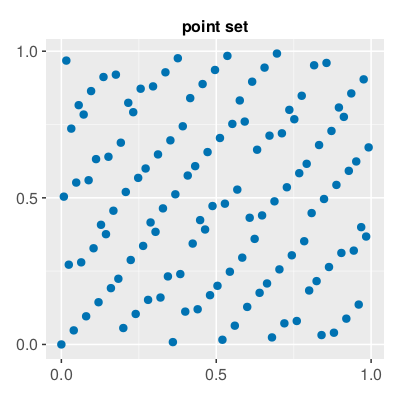

In [20]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1,1], title = "point set")
scatter!( Point2.(pts) )

# ax = Axis(fig[1,2], title = "reduced point set")
# scatter!( Point2.(pts_r) )
fig

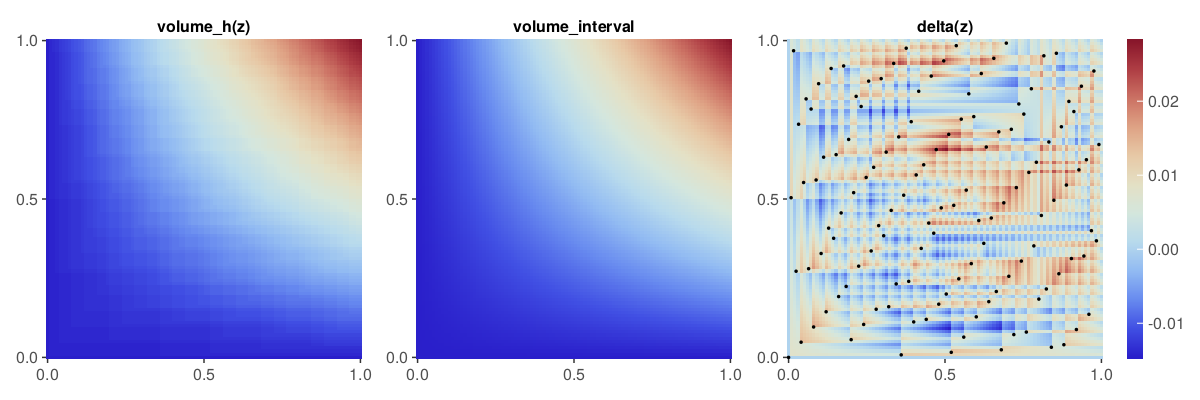

In [21]:
x = LinRange(0,1,100)
y = LinRange(0,1,100)
fig = Figure(resolution = (1200, 400))
ax = Axis(fig[1,1], title="volume_h(z)")
A = [vol_h((a,b),pts[1:end]) for a in x, b in y]
heatmap!(x,y, A, colormap = "thermometer" )

ax = Axis(fig[1,2], title = "volume_interval")
B = [a*b for a in x, b in y]
heatmap!(x,y, B,colormap = "thermometer" )

ax = Axis(fig[1,3], title = "delta(z)")
hm = heatmap!(x,y, A-B, colormap = "thermometer" )
scatter!( Point2.(pts), color = :black, markersize = 5 )
Colorbar(fig[1,4], hm)
fig